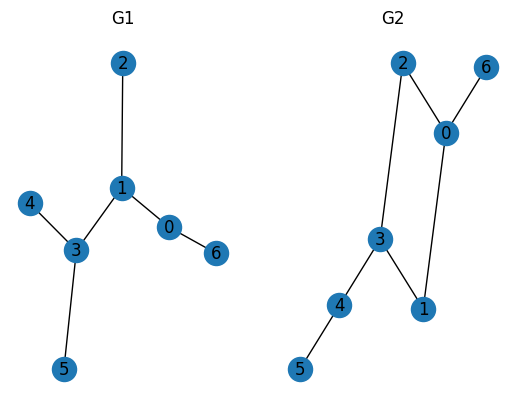

measures(G1) = [1.71, 3.71, 0.78, 0.0, 2.19, -0.45]
measures(G2) = [2.0, 4.57, 0.57, 0.0, 2.19, -0.46]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

A1 = np.array([
#    0 1 2 3 4 5 6
    [0,1,0,0,0,0,1], # 0
    [1,0,1,1,0,0,0], # 1
    [0,1,0,0,0,0,0], # 2
    [0,1,0,0,1,1,0], # 3
    [0,0,0,1,0,0,0], # 4
    [0,0,0,1,0,0,0], # 5
    [1,0,0,0,0,0,0]  # 6
    ]) 
G1 = nx.from_numpy_array(np.array(A1), create_using=nx.Graph)  

A2 = np.array([
#    0 1 2 3 4 5 6
    [0,1,1,0,0,0,1], # 0
    [1,0,0,1,0,0,0], # 1
    [1,0,0,1,0,0,0], # 2
    [0,1,1,0,1,0,0], # 3
    [0,0,0,1,0,1,0], # 4
    [0,0,0,0,1,0,0], # 5
    [1,0,0,0,0,0,0]  # 6
    ]) 
G2 = nx.from_numpy_array(np.array(A2), create_using=nx.Graph)  

plt.subplot(1,2,1)
plt.title("G1")
nx.draw_kamada_kawai(G1,with_labels=True)
plt.subplot(1,2,2)
plt.title("G2")
nx.draw_kamada_kawai(G2,with_labels=True)
plt.show()

def measures(G):
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    return  k1, k2, variance, av_cl, l, r

results_G1 = measures(G1)
results_G2 = measures(G2)

print(f"measures(G1) = {[round(result, 2) for result in results_G1]}")
print(f"measures(G2) = {[round(result, 2) for result in results_G2]}")

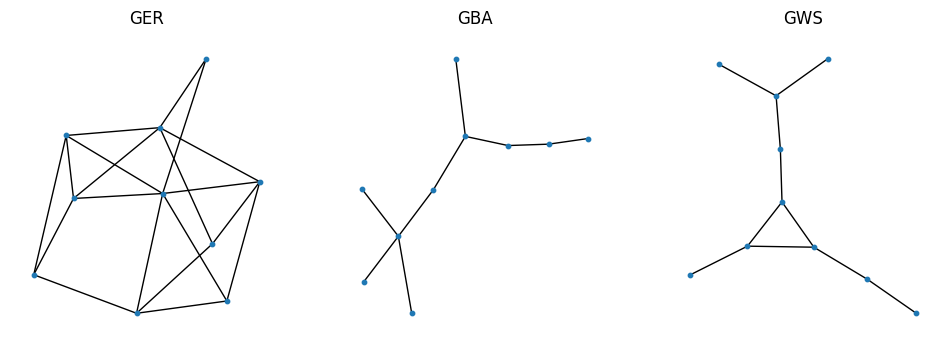

Betti numbers(GER) =  [1, 4, 0]
Betti numbers(GBA) =  [1, 0]
Betti numbers(GWS) =  [1, 0, 0]
measures(GER) = [3.8, 15.6, 1.16, 0.32, 1.62, -0.4]
measures(GBA) = [1.8, 4.2, 0.96, 0.0, 2.91, -0.73]
measures(GWS) = [2.0, 4.8, 0.8, 0.1, 2.84, -0.25]


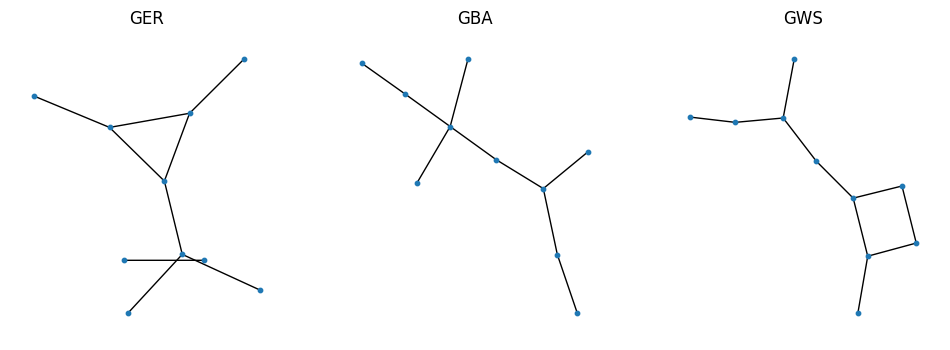

Betti numbers(GER) =  [2, 0, 0]
Betti numbers(GBA) =  [1, 0]
Betti numbers(GWS) =  [1, 1]
measures(GER) = [2.0, 5.0, 1.0, 0.12, 2.25, -0.33]
measures(GBA) = [1.8, 4.2, 0.96, 0.0, 2.8, -0.55]
measures(GWS) = [2.0, 4.6, 0.6, 0.0, 2.87, -0.37]


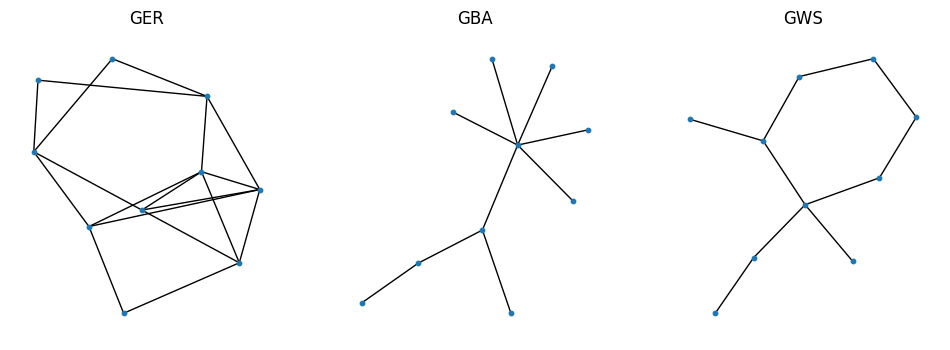

Betti numbers(GER) =  [1, 4, 0, 0]
Betti numbers(GBA) =  [1, 0]
Betti numbers(GWS) =  [1, 1]
measures(GER) = [3.6, 14.2, 1.24, 0.23, 1.71, 0.06]
measures(GBA) = [1.8, 5.6, 2.36, 0.0, 2.29, -0.67]
measures(GWS) = [2.0, 4.8, 0.8, 0.0, 2.42, -0.28]


In [4]:
import networkx as nx
import gudhi

# Parâmetros dados
n_nodes = 10
av_degree = 3

# Parâmetros calculados
p = av_degree/(n_nodes-1)
m = int(av_degree/2)
k = int(av_degree)

def m_component(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    return G.subgraph(Gcc[0])


for i in range(0,3):
    # Erdos-Reni
    GER = nx.erdos_renyi_graph(n_nodes, p, seed=None, directed=False)
    # Barabasi-Albert
    GBA = nx.barabasi_albert_graph(n_nodes, m, seed=None)
    # Small-world
    GWS = nx.watts_strogatz_graph(n_nodes, k, p, seed=None)
    
    # Obter a lista de cliques para cada rede
    er_cliques = list(nx.enumerate_all_cliques(GER))
    ba_cliques = list(nx.enumerate_all_cliques(GBA))
    ws_cliques = list(nx.enumerate_all_cliques(GWS))
    
    #print("cliques")
    #print(er_cliques)
    #print(ba_cliques)
    #print(ws_cliques)

    # Criar o complexo simplicial a partir das listas de cliques
    er_complex = gudhi.SimplexTree()
    for clique in er_cliques:
        er_complex.insert(clique)

    ba_complex = gudhi.SimplexTree()
    for clique in ba_cliques:
        ba_complex.insert(clique)
    
    ws_complex = gudhi.SimplexTree()
    for clique in ws_cliques:
        ws_complex.insert(clique)

    # Calcular a homologia de cliques para cada complexo
    er_homology = er_complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)
    ba_homology = ba_complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)
    ws_homology = ws_complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)

    er_betti = er_complex.betti_numbers()
    ba_betti = ba_complex.betti_numbers()
    ws_betti = ws_complex.betti_numbers()

    plt.figure(figsize=(12, 4))

    plt.subplot(1,3,1)
    plt.title("GER")
    nx.draw_kamada_kawai(GER, with_labels=False, node_size=10)
    
    plt.subplot(1,3,2)
    plt.title("GBA")
    nx.draw_kamada_kawai(GBA, with_labels=False, node_size=10)
        
    plt.subplot(1,3,3)
    plt.title("GWS")
    nx.draw_kamada_kawai(GWS, with_labels=False, node_size=10)
    
    plt.show()

    print("Betti numbers(GER) = ", er_betti)
    print("Betti numbers(GBA) = ", ba_betti)
    print("Betti numbers(GWS) = ", ws_betti)
        
    GER = m_component(GER)
    GBA = m_component(GBA)
    GWS = m_component(GWS)

    er_measures = measures(GER)
    ba_measures = measures(GBA)
    ws_measures = measures(GWS)

    print(f"measures(GER) = {[round(result, 2) for result in er_measures]}")
    print(f"measures(GBA) = {[round(result, 2) for result in ba_measures]}")
    print(f"measures(GWS) = {[round(result, 2) for result in ws_measures]}")

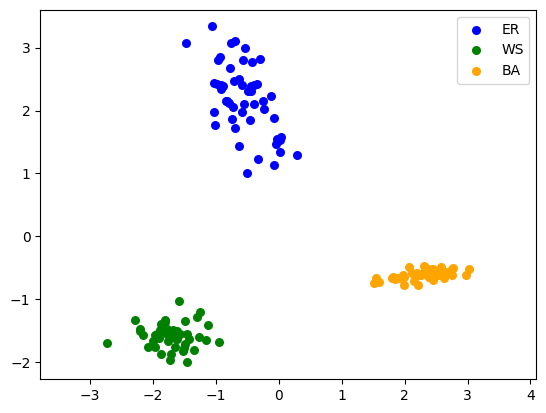

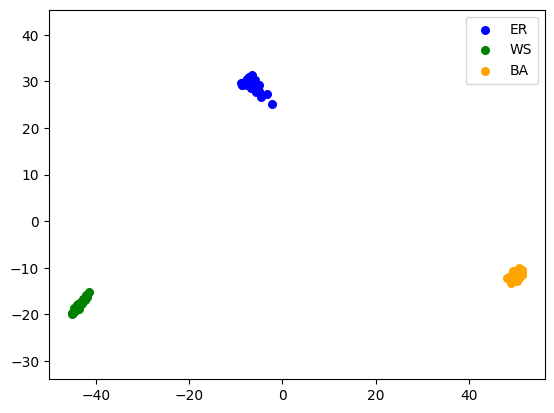

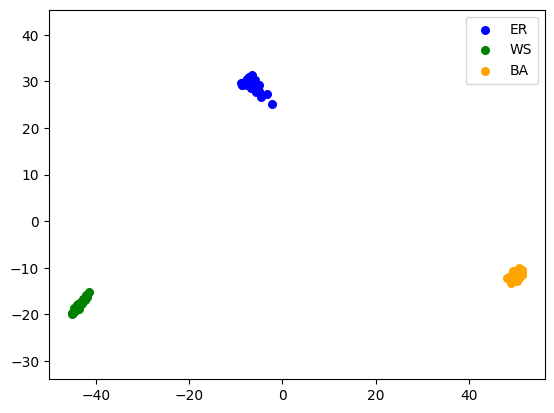

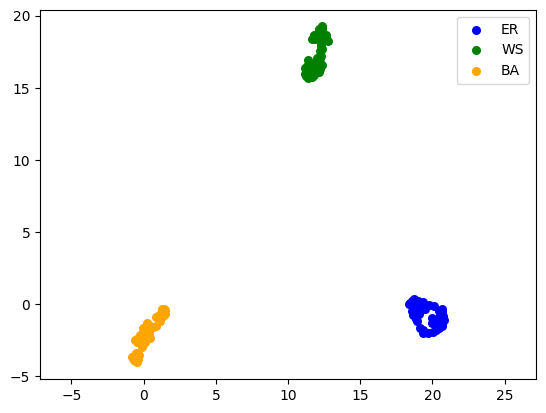

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import umap
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


#ER networks
X = []
y = []
N = 116
n_nets = 50
av_degree = 25
p = av_degree/(N-1)
for i in range(0,n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GER)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(0)

#WS networks
k = int(av_degree)
p = 0.1 #probability of rewiring
for i in range(0,n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GWS)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(1)

# BA networks
m = int(av_degree/2)
for i in range(0,n_nets):
    GBA = nx.barabasi_albert_graph(N, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GBA)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(2)
    
X = np.array(X)
y = np.array(y)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Reduce dimension to 2 with PCA Principal Component Analysis
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=0))

# Reduce dimension to 2 with Linear Discriminant Analysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with Neighborhood Component Analysis
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=0),
)

uma = umap.UMAP()

dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca), ("UMAP", uma)]

cl = ['ER','WS','BA']

# Define colors for each class and for the test case
colors = ['blue', 'green', 'orange', 'red']

# Plot each method's projection
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()

    # Fit the method's model
    model.fit(X, y)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)
    
    for j in range(len(cl)):
        plt.scatter(
            X_embedded[y == j, 0],
            X_embedded[y == j, 1],
            c=colors[j],
            s=30,
            label=cl[j],
        )
    plt.legend()
    plt.axis('equal')
plt.show()